<a href="https://colab.research.google.com/github/LeticiaGDornelas/Projetos_DNC/blob/main/Desafio5_LeticiaGDornelas_DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desafio 5: Limpeza e Organização de dados com Python**
**Preparação de um dataset para modelagem de dados em Python**

Resumo do que foi feito:

1) Importação do dataset para o colab;

2) Entendimento dos dados;

3) Tratamento dos dados nulos;

4) Tratamento dos outliers;

5) Desenvolvimento de um algoritmo para receber o arquivo csv de entrada e retornar um algoritmo de saída com as seguintes colunas: CustomerID, Recência, Frequência e Ticket médio.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Data - data (2).csv.csv')

df_copy = df.copy()
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# Verificar a distribuição de dados
df_copy.describe()

,Quantity,UnitPrice,CustomerID
count,87883.000000,87883.000000,55980.000000
mean,8.543723,5.434974,15352.575777
std,358.439881,126.119562,1771.170918
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13871.000000
50%,3.000000,2.510000,15311.000000
75%,8.000000,4.250000,17001.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
# Analisar os tipos de dados
df_copy.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# Verificando os valores nulos em CustomerID
df_copy['CustomerID'].isnull().sum()

31903

In [ ]:
# Remover linhas em que 'CustomerID' é nulo
df_copy.dropna(axis=0, subset=['CustomerID'], inplace=True)

In [ ]:
# Contar valores nulos na coluna 'CustomerID' após a remoção
df_copy['CustomerID'].isnull().sum()

0

In [ ]:
# Filtro para verificar dados nulos ou menores que zero na coluna 'UnitPrice'
filtro_df = df_copy[df_copy['UnitPrice'].isnull() | (df_copy['UnitPrice'] < 0)]
print(filtro_df)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [ ]:
# Filtrar o DataFrame para conter apenas linhas onde 'UnitPrice' é maior que zero
filtro_df_preco = df_copy[df_copy['UnitPrice'] > 0]
display(filtro_df_preco)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
87878,543735,22728,ALARM CLOCK BAKELIKE PINK,12,2/11/2011 12:32,3.75,16191.0,United Kingdom
87879,543735,22725,ALARM CLOCK BAKELIKE CHOCOLATE,12,2/11/2011 12:32,3.75,16191.0,United Kingdom
87880,543736,22710,WRAP I LOVE LONDON,25,2/11/2011 12:36,0.42,15044.0,United Kingdom
87881,543736,22986,GINGHAM ROSE WRAP,25,2/11/2011 12:36,0.42,15044.0,United Kingdom


In [ ]:
# Filtro para verificar dados nulos ou menores que zero na coluna 'Quantity'
filtro_df_quantity = df_copy[df_copy['Quantity'].isnull() | (df_copy['Quantity'] < 0)]
print(filtro_df_quantity)

      InvoiceNo StockCode                        Description  Quantity  \
141     C536379         D                           Discount        -1   
154     C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235     C536391     22556      PLASTERS IN TIN CIRCUS PARADE       -12   
236     C536391     21984    PACK OF 12 PINK PAISLEY TISSUES       -24   
237     C536391     21983    PACK OF 12 BLUE PAISLEY TISSUES       -24   
...         ...       ...                                ...       ...   
87604   C543663     22846          BREAD BIN DINER STYLE RED        -1   
87634   C543671     22602  RETROSPOT WOODEN HEART DECORATION       -36   
87635   C543671     22600      CHRISTMAS RETROSPOT STAR WOOD       -12   
87648   C543706     22423           REGENCY CAKESTAND 3 TIER        -1   
87754   C543729     22698     PINK REGENCY TEACUP AND SAUCER        -1   

           InvoiceDate  UnitPrice  CustomerID         Country  
141    12/1/2010 09:41      27.50     14527.0  

In [ ]:
# Filtrar o DataFrame para conter apenas linhas onde 'UnitPrice' é maior que zero
filtro_df_quantidade = df_copy[df_copy['Quantity'] > 0]
display(filtro_df_quantidade)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
87878,543735,22728,ALARM CLOCK BAKELIKE PINK,12,2/11/2011 12:32,3.75,16191.0,United Kingdom
87879,543735,22725,ALARM CLOCK BAKELIKE CHOCOLATE,12,2/11/2011 12:32,3.75,16191.0,United Kingdom
87880,543736,22710,WRAP I LOVE LONDON,25,2/11/2011 12:36,0.42,15044.0,United Kingdom
87881,543736,22986,GINGHAM ROSE WRAP,25,2/11/2011 12:36,0.42,15044.0,United Kingdom


In [ ]:
# Eliminando quantidade de produtos e valor unitário menor ou igual a 0
df_copy.drop(df_copy.query('UnitPrice <= 0').index, axis=0, inplace=True)
df_copy.drop(df_copy.query('Quantity <= 0').index, axis=0, inplace=True)

In [ ]:
# Verificando registros duplicados
df_copy[df_copy.duplicated(keep=False)].sort_values('Description')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
604,536412,21448,12 DAISY PEGS IN WOOD BOX,2,12/1/2010 11:49,1.65,17920.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2,12/1/2010 11:49,1.65,17920.0,United Kingdom
601,536412,21448,12 DAISY PEGS IN WOOD BOX,2,12/1/2010 11:49,1.65,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
4658,536796,21578,WOODLAND DESIGN COTTON TOTE BAG,1,12/2/2010 15:46,2.25,15574.0,United Kingdom
73913,542393,21169,YOU'RE CONFUSING ME METAL SIGN,1,1/27/2011 15:02,1.69,18125.0,United Kingdom
73915,542393,21169,YOU'RE CONFUSING ME METAL SIGN,1,1/27/2011 15:02,1.69,18125.0,United Kingdom
80603,543040,84836,ZINC METAL HEART DECORATION,1,2/2/2011 17:06,1.25,17337.0,United Kingdom


In [ ]:
# Removendo registros duplicados
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.describe()

,Quantity,UnitPrice,CustomerID
count,53609.000000,53609.000000,53609.000000
mean,14.060960,3.169267,15354.963812
std,324.118568,5.379312,1773.636503
min,1.000000,0.070000,12346.000000
25%,2.000000,1.250000,13871.000000
50%,5.000000,1.950000,15311.000000
75%,12.000000,3.750000,17017.000000
max,74215.000000,295.000000,18283.000000


In [ ]:
# Alterar o tipo de dados em 'InvoiceDate' e 'CustomerID'
df_copy = df_copy.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID': 'int64'})

In [ ]:
# Verificar a alteração de tipos de dados
df_copy.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


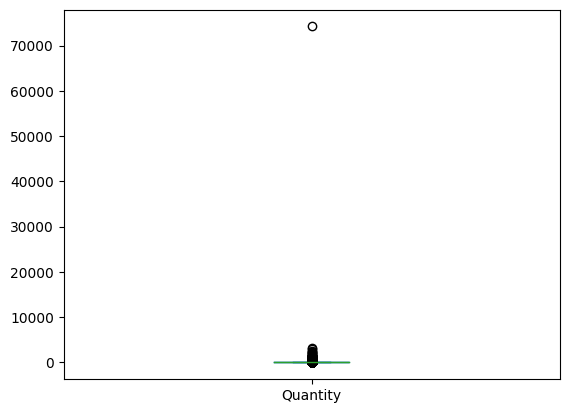

In [ ]:
# Verificar distribuição em 'Quantity'
df_copy['Quantity'].plot.box();

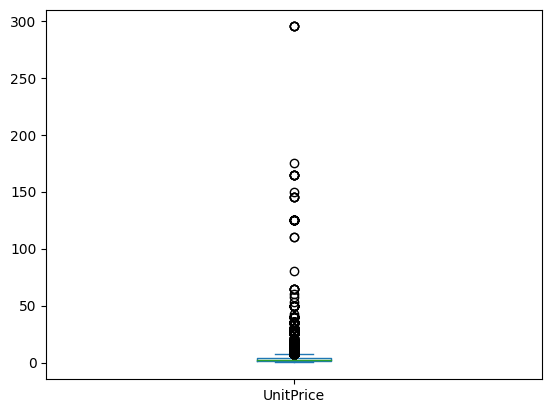

In [ ]:
# Verificar distribuição em 'UnitPrice'
df_copy['UnitPrice'].plot.box();

In [ ]:
# Eliminar outliers de 'Quantity' e 'UnitPrice
df_copy.drop(df_copy.query('Quantity > 10000').index, axis=0, inplace=True)
df_copy.drop(df_copy.query('UnitPrice > 5000').index, axis=0, inplace=True)

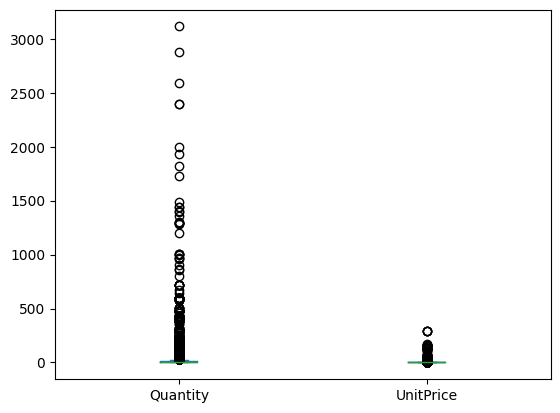

In [ ]:
# Verificar a distribuição de 'Quantity' e 'UnitPrice' após a remoção
df_copy[['Quantity', 'UnitPrice']].plot.box();

In [ ]:
# Criar uma nova coluna 'Total' com valores de 'Quantity' e 'UnitPrice'
df_copy['Total'] = df_copy['Quantity'] * df_copy['UnitPrice']

In [ ]:
# Verificando a nova tabela
df_copy

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
87878,543735,22728,ALARM CLOCK BAKELIKE PINK,12,2011-02-11 12:32:00,3.75,16191,United Kingdom,45.00
87879,543735,22725,ALARM CLOCK BAKELIKE CHOCOLATE,12,2011-02-11 12:32:00,3.75,16191,United Kingdom,45.00
87880,543736,22710,WRAP I LOVE LONDON,25,2011-02-11 12:36:00,0.42,15044,United Kingdom,10.50
87881,543736,22986,GINGHAM ROSE WRAP,25,2011-02-11 12:36:00,0.42,15044,United Kingdom,10.50


In [ ]:
# Retornando a data da última compra
ultimadata = df_copy['InvoiceDate'].max()
ultimadata

Timestamp('2011-02-11 12:36:00')

In [ ]:
# Agrupar o total vendido por país
agg_count = df_copy.groupby(['Country'])['Total'].agg('sum').reset_index().sort_values('Total', ascending=False)
agg_count.reset_index(inplace=True)
agg_count.drop('index', axis=1, inplace=True)
agg_count

,Country,Total
0,United Kingdom,1000428.55
1,Netherlands,36916.37
2,Germany,34709.22
3,EIRE,32533.50
4,France,30723.84
5,Spain,13598.16
6,Japan,13485.88
7,Australia,10243.01
8,Sweden,7830.12
9,Portugal,6495.68


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

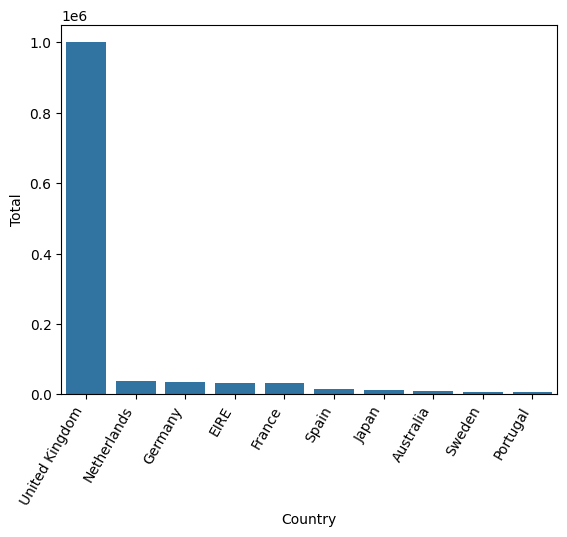

In [ ]:
# Retornar o TOP10
top_count = agg_count.loc[agg_count.index <= 9]

# Gráfico com o TOP10
sns.barplot(data=top_count, x='Country', y='Total')
plt.xticks(rotation=60, ha='right');

In [ ]:
# Agrupar a quantidade de produtos vendidos por produto
agg_prod = df_copy.groupby(['StockCode'])['Quantity'].agg('sum').reset_index().sort_values('Quantity', ascending=False)
agg_prod.reset_index(inplace=True)
agg_prod.drop('index', axis=1, inplace=True)
agg_prod

,StockCode,Quantity
0,85123A,10082
1,84077,9460
2,21212,7563
3,85099B,5758
4,22693,5571
...,...,...
2665,72799C,1
2666,35599B,1
2667,90123D,1
2668,84596J,1


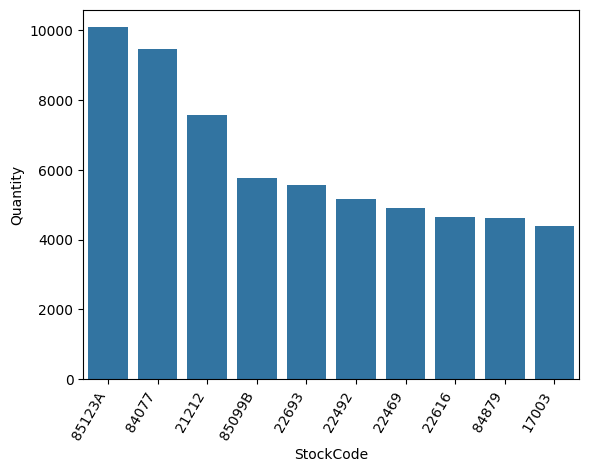

In [ ]:
# Retornar o TOP10
top_prod = agg_prod.loc[agg_prod.index <= 9]

# TOP10 produtos mais vendidos
sns.barplot(data=top_prod, x='StockCode', y='Quantity')
plt.xticks(rotation=60, ha='right');

In [ ]:
# Agrupar a quantidade e o valor total vendido por mês
df_alt = df_copy.set_index('InvoiceDate').sort_index()
agg_date = df_alt[['Quantity', 'Total']].resample('M').sum()
agg_date

<ipython-input-32-769937a7b10a>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  agg_date = df_alt[['Quantity', 'Total']].resample('M').sum()


,Quantity,Total
InvoiceDate,,
2010-12-31,311048,570422.73
2011-01-31,274258,490917.71
2011-02-28,94273,162487.60


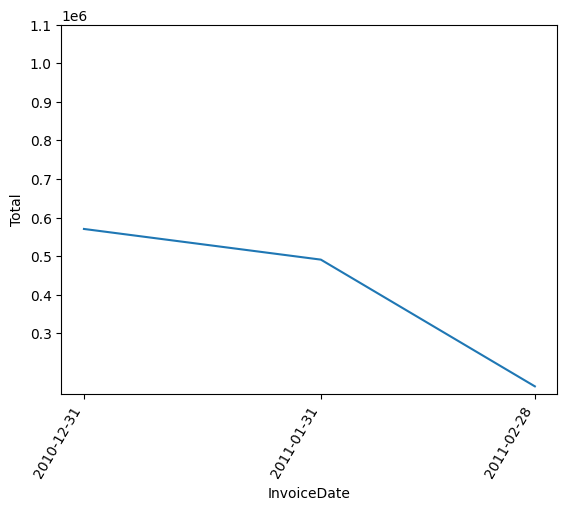

In [ ]:
# Total vendido por mês
sns.lineplot(data=agg_date, x=agg_date.index, y='Total')
plt.xticks(agg_date.index, rotation=60, ha='right')
plt.yticks(np.arange(300000, 1200000, step=100000));

In [ ]:
# Filtrar os dados de vendas feitas nos TOP10 países
df_alt['Period'] = df_alt.index.strftime('%m/%Y')
df_alt = df_alt[df_alt['Country'].isin(top_count['Country'])]
df_alt

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Period
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30,12/2010
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00,12/2010
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34,12/2010
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34,12/2010
...,...,...,...,...,...,...,...,...,...
2011-02-11 12:32:00,543735,22726,ALARM CLOCK BAKELIKE GREEN,12,3.75,16191,United Kingdom,45.00,02/2011
2011-02-11 12:32:00,543735,22728,ALARM CLOCK BAKELIKE PINK,12,3.75,16191,United Kingdom,45.00,02/2011
2011-02-11 12:32:00,543735,22725,ALARM CLOCK BAKELIKE CHOCOLATE,12,3.75,16191,United Kingdom,45.00,02/2011


In [ ]:
# Agregar os dados por País e Mês
agg_mt = df_alt.groupby(['Country', 'Period'])['Total'].agg('sum')
agg_mt = agg_mt.reset_index()
agg_mt['Period'] = pd.to_datetime(agg_mt['Period'], format='%m/%Y')
agg_mt = agg_mt.sort_values('Period')
agg_mt

,Country,Period,Total
13,Japan,2010-12-01,7705.07
24,Sweden,2010-12-01,3834.30
21,Spain,2010-12-01,1843.73
18,Portugal,2010-12-01,2439.97
16,Netherlands,2010-12-01,8784.48
11,Germany,2010-12-01,15205.74
8,France,2010-12-01,9616.31
27,United Kingdom,2010-12-01,496477.34
5,EIRE,2010-12-01,8813.88
2,Australia,2010-12-01,965.35


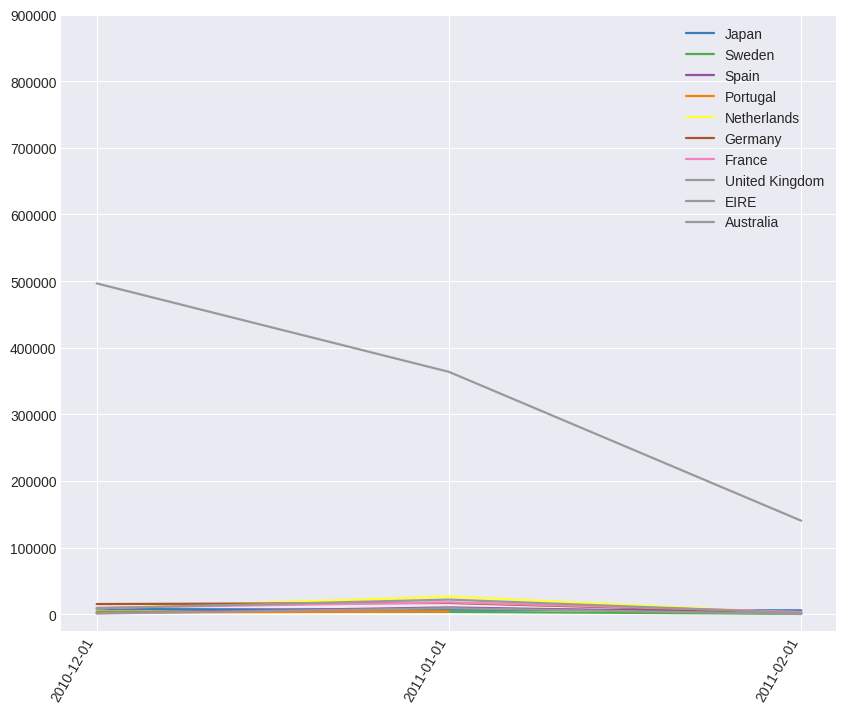

In [ ]:
# Gráfico para cada país com o total vendido por mês
plt.figure(figsize=(10,8))
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set1')
n = 0
for value in agg_mt['Country'].unique():
  n += 1
  country = agg_mt.loc[agg_mt['Country'] == value]
  plt.plot(country['Period'], country['Total'], marker='', color=palette(n), linewidth=1.6, alpha=1, label=value)
  plt.xticks(ticks=country['Period'], rotation=60, ha='right')
  plt.yticks(ticks=np.arange(0, 1000000, step=100000))
  plt.legend();

In [ ]:
# Agrupar dados de quantidade e valor vendido por Cliente, Compra e Data
rfm = df_alt.groupby(['CustomerID', 'InvoiceNo', 'InvoiceDate'])[['Quantity', 'Total']].agg('sum').reset_index()
rfm = rfm.sort_values('CustomerID')
rfm

,CustomerID,InvoiceNo,InvoiceDate,Quantity,Total
0,12356,541430,2011-01-18 09:50:00,1216,2271.62
1,12386,537676,2010-12-08 09:53:00,214,258.90
2,12386,540280,2011-01-06 12:37:00,140,143.00
3,12388,541271,2011-01-17 11:12:00,204,431.30
4,12388,543357,2011-02-07 13:59:00,37,124.05
...,...,...,...,...,...
2718,18260,540539,2011-01-09 14:42:00,429,557.07
2717,18260,539315,2010-12-16 18:23:00,58,230.70
2719,18269,537817,2010-12-08 13:53:00,76,168.60
2720,18283,540350,2011-01-06 14:14:00,61,108.45


In [ ]:
# Calculando somente a Recência de cada cliente
r_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'LastPurchase': customer['InvoiceDate'].max()}
    r_only.append(values)

r_only = pd.DataFrame(r_only)
r_only['Recency'] = (ultimadata - r_only['LastPurchase']).dt.days
r_only.drop('LastPurchase', axis=1, inplace=True)
r_only

,CustomerID,Recency
0,12356,24
1,12386,35
2,12388,3
3,12393,28
4,12413,35
...,...,...
1410,18250,8
1411,18259,64
1412,18260,32
1413,18269,64


In [ ]:
# Calculando somente a Frequência de cada Cliente
f_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Frequency': customer['InvoiceNo'].count()}
    f_only.append(values)

f_only = pd.DataFrame(f_only)
f_only

,CustomerID,Frequency
0,12356,1
1,12386,2
2,12388,2
3,12393,2
4,12413,1
...,...,...
1410,18250,1
1411,18259,1
1412,18260,2
1413,18269,1


In [ ]:
# Calculando somente o valor médio gasto por cliente
m_only = []

for v in rfm['CustomerID'].unique():
    customer = rfm.loc[rfm['CustomerID'] == v]
    values = {'CustomerID': v, 'Monetary': customer['Total'].mean()}
    m_only.append(values)

m_only = pd.DataFrame(m_only)
m_only

,CustomerID,Monetary
0,12356,2271.620
1,12386,200.950
2,12388,277.675
3,12393,319.750
4,12413,479.250
...,...,...
1410,18250,349.270
1411,18259,376.300
1412,18260,393.885
1413,18269,168.600


In [ ]:
# Criando a tabela final com o RFM completo
final_rfm = r_only.merge(f_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.merge(m_only, left_on='CustomerID', right_on='CustomerID')
final_rfm.head(10).style.format('{:.2f}', subset='Monetary')

,CustomerID,Recency,Frequency,Monetary
0,12356,24,1,2271.62
1,12386,35,2,200.95
2,12388,3,2,277.68
3,12393,28,2,319.75
4,12413,35,1,479.25
5,12415,32,2,3546.49
6,12421,17,1,157.45
7,12422,23,1,238.50
8,12427,70,1,303.50
9,12431,13,3,363.71


In [ ]:
# Criando a tabela final com RFM completo
final_rfm = r_only.merge(f_only, left_on='CustomerID', right_on='CustomerID')
final_rfm = final_rfm.merge(m_only, left_on='CustomerID', right_on='CustomerID')

# Salvar o DataFrame em um arquivo CSV
final_rfm.to_csv('final_rfm_metrics.csv', index=False)

# Baixar o arquivo CSV para o computador
from google.colab import files
files.download('final_rfm_metrics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>